In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import sys,os
import numpy as np

In [4]:
from scipy.optimize import curve_fit

In [5]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [6]:
import mdtraj as md

## Temperature Replica exchange

### Setup 

In [42]:
%%bash 
ff="amber99sb-star-ildn"
wat="tip3p"
host="F"
for soup in "soup" "soupF"
do
    echo $soup
    edr="../data/${soup}_XXL_${ff}TRUE_${wat}_mini"
    out="../analysis/${soup}_XXL_${ff}TRUE_${wat}_mini_energy"
    echo $edr
    gmx energy -f $edr -o $out <<EOF
11
EOF
done

soup
../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_mini


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_mini -o ../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_mini_energy

Opened ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_mini.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Pres.-DC      
 13  Pressure        14  dVremain/dl     15  Vir-XX    


Statistics over 9008 steps [ 0.0000 through 9007.0000 ps ], 1 data sets
All statistics are over 7126 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -471532     120000 2.6456e+06    -727697  (kJ/mol)
soupF
../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_mini


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_mini -o ../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_mini_energy

Opened ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_mini.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Pres.-DC      
 13  Pressure        14  dVremain/dl     15  Vir-XX 


Statistics over 7340 steps [ 0.0000 through 7339.0000 ps ], 1 data sets
All statistics are over 5812 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -420119     160000 3.20761e+06    -945177  (kJ/mol)


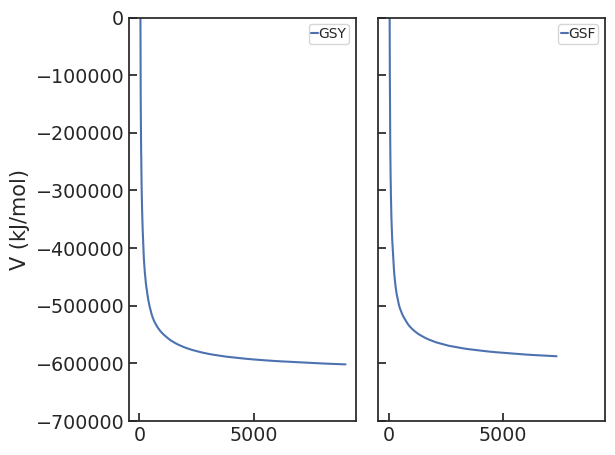

In [54]:
soups = ["GSY", "GSF"]
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
for i, soup in enumerate(["soup", "soupF"]):
    filename = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_mini_energy.xvg"%soup
    data = np.loadtxt(filename, comments=["#", "@"])
    ax[i].plot(data[:,0], data[:,1], label='%s'%soups[i])
ax[-1].set_ylim(-7e5,0)
ax[0].set_ylabel('V (kJ/mol)')
ax[0].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
ax[1].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
plt.tight_layout()

In [57]:
%%bash 
ff="amber99sb-star-ildn"
wat="tip3p"
for soup in "soup_XXL" "soupF_XXL"
do
    echo $pdb
    edr="../data/${soup}_${ff}TRUE_${wat}_nvt"
    out="../analysis/${soup}_${ff}TRUE_${wat}_nvt_temp"
    echo $edr
    gmx energy -f $edr -o $out <<EOF
13
EOF
done


../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt -o ../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt_temp

Opened ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  Per.-Imp.-Dih.   4  LJ-14         
  5  Coulomb-14       6  LJ-(SR)          7  Disper.-corr.    8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Temperature     14  Pres.-DC        15  Pressure       


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                  298.13       0.06    3.79587   0.311427  (K)

../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt -o ../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt_temp

Opened ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  Per.-Imp.-Dih.   4  LJ-14         
  5  Coulomb-14       6  LJ-(SR)          7  Disper.-corr.    8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Temperature     14  Pres.-DC        15  Pressure    


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 298.108      0.065    3.80078   0.331282  (K)


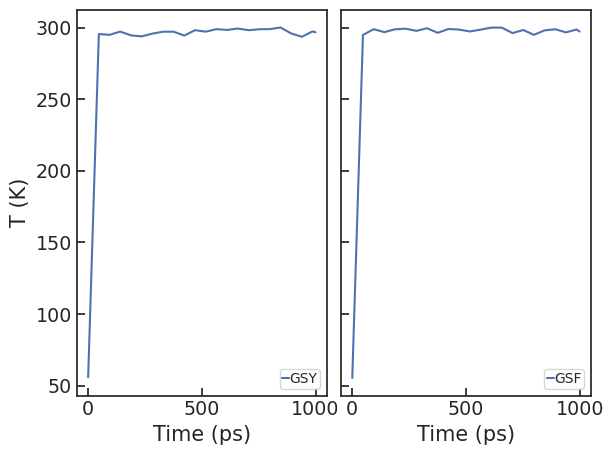

In [63]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
for i, soup in enumerate(["soup", "soupF"]):
    filename = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_nvt_temp.xvg"%soup
    data = np.loadtxt(filename, comments=["#", "@"])
    ax[i].plot(data[:,0], data[:,1], label='%s'%soups[i])
ax[0].set_ylabel('T (K)')
ax[0].set_xlabel('Time (ps)')
ax[1].set_xlabel('Time (ps)')
ax[0].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
ax[1].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
plt.tight_layout(w_pad=0)

In [65]:
%%bash

ff="amber99sb-star-ildn"
wat="tip3p"
for soup in "soup" "soupF"
do
    edr="../data/${soup}_XXL_${ff}TRUE_${wat}_npt_berendsen"
    out="../analysis/${soup}_XXL_${ff}TRUE_${wat}_npt_berendsen_density"
    echo $edr
    gmx energy -f $edr -o $out <<EOF
23
EOF
done

../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen -o ../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen_density

Opened ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  Per.-Imp.-Dih.   4  LJ-14         
  5  Coulomb-14       6  LJ-(SR)          7  Disper.-corr.    8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Conserved-En.   14  Te


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                      1063.3       0.96    10.3548   -4.61576  (kg/m^3)
../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen

Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1053.87          1    10.1959   -5.33914  (kg/m^3)


                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx energy -f ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen -o ../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen_density

Opened ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  Per.-Imp.-Dih.   4  LJ-14         
  5  Coulomb-14       6  LJ-(SR)          7  Disper.-corr.    8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Conserved-En.   14 

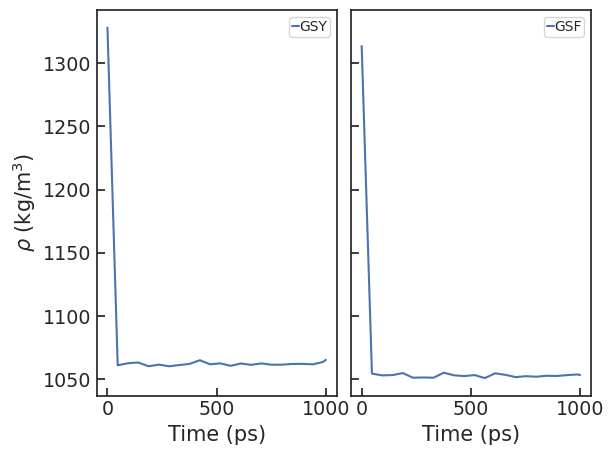

In [68]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
for i, soup in enumerate(["soup", "soupF"]):
    filename = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_npt_berendsen_density.xvg"%soup
    data = np.loadtxt(filename, comments=["#", "@"])
    ax[i].plot(data[:,0], data[:,1], label='%s'%soups[i])
ax[0].set_ylabel(r'$\rho$ (kg/m$^3$)')
ax[0].set_xlabel('Time (ps)')
ax[1].set_xlabel('Time (ps)')
ax[0].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
ax[1].legend(fontsize=10, borderpad=0.2, handletextpad=0, handlelength=.5)
plt.tight_layout(w_pad=0)

In [2]:
%%bash --no-raise-error

ff="amber99sb-star-ildn"
wat="tip3p"
for soup in soupF_XXL soup_XXL
do
   tpr="../data/${soup}_${ff}TRUE_${wat}_nvt500"
   xtc="../data/${soup}_${ff}TRUE_${wat}_nvt500"
   out="../analysis/${soup}_${ff}TRUE_${wat}_nvt500_sasa"
   gmx sasa -s $tpr -f $xtc -o $out -dt 10 <<EOF &
14
EOF
done

rm \#* data/\#*


rm: cannot remove '#*': No such file or directory
rm: cannot remove 'data/#*': No such file or directory
                       :-) GROMACS - gmx sasa, 2024.1 (-:

Executable:   /usr/local/gromacs/2024.1/bin/gmx
                       :-) GROMACS - gmx sasa, 2024.1 (-:

Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx sasa -s ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500 -f ../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500 -o ../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa -dt 10

Executable:   /usr/local/gromacs/2024.1/bin/gmx
Data prefix:  /usr/local/gromacs/2024.1
Working dir:  /data1/daviddesancho/Research/Projects/LLPS/Stickers/PHETYR
Command line:
  gmx sasa -s ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500 -f ../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500 -o ../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa -dt 10

Reading file ../data/sou


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------




++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
Frank Eisenhaber and Philip Lijnzaad and Patrick Argos and Chris Sander and
Michael Scharf
The Double Cube Lattice Method: Efficient Approaches to Numerical Integration
of Surface Area and Volume and to Dot Surface Contouring of Molecular
Assemblies
J. Comp. Chem. 16 (1995) pp. 273-284
-------- -------- --- Thank You --- -------- --------




         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------



Reading frame       0 time    0.000   
Back Off! I just backed up ../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa.xvg to ../analysis/#soupF_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa.xvg.2#

Back Off! I just backed up ../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa.xvg to ../analysis/#soup_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa.xvg.2#
Reading frame    2000 time 40000.000   
Analyzed 2501 frames, last time 50000.000

GROMACS reminds you: "And I Will Strike Down Upon Thee With Great Vengeance and With Furious Anger Those Who Attempt to Poison and Destroy My Brothers." (Pulp Fiction)


Analyzed 2501 frames, last time 50000.000

GROMACS reminds you: "Let us not get carried away with our ideas and take our models too seriously" (Nancy Swanson)



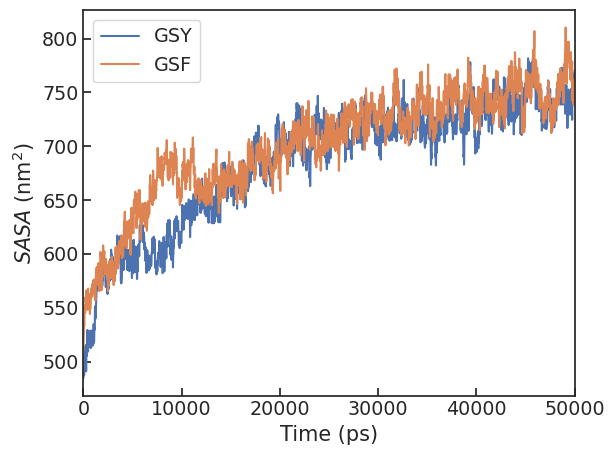

In [6]:
fig, ax = plt.subplots()
labels = ['GSY', 'GSF']
for i,soup in enumerate(["soup", "soupF"]):
    xvg = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_nvt500_sasa.xvg"%soup
    data = np.loadtxt(xvg, comments=["#", "@"])
    ax.plot(data[:,0], data[:,1], label=labels[i])
ax.set_xlim(0,50e3)
ax.set_xlabel('Time (ps)')
ax.set_ylabel('$SASA$ (nm$^2$)')
plt.legend(loc=2)
plt.tight_layout()    